In [25]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
df = pd.read_csv('House_Rent_Dataset.csv')
print(df.shape)
df.head()

(4746, 12)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Columns description
**BHK**: Number of Bedrooms, Hall, Kitchen.

**Rent**: Rent of the Houses/Apartments/Flats.

**Size** : Size of the Houses/Apartments/Flats in Square Feet.

**Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

**Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

**Area Locality**: Locality of the Houses/Apartments/Flats.

**City**: City where the Houses/Apartments/Flats are Located.

**Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

**Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.

**Bathroom**: Number of Bathrooms.

**Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [28]:
#Checking if there's any missing values
print(df.isna().sum(),"\n")
print(df.isnull().sum(),"\n")
for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col}: {len(unique_values)} unique values")
df.drop_duplicates(inplace=True)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64 

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64 

Posted On: 81 unique values
BHK: 6 unique values
Rent: 243 unique values
Size: 615 unique values
Floor: 480 unique values
Area Type: 3 unique values
Area Locality: 2235 unique values
City: 6 unique values
Furnishing Status: 3 unique values
Tenant Preferred: 3 unique values
Bathroom: 8 unique values
Point of Contact: 3 unique values


In [29]:
#Exploring the floor column
print(df['Floor'].unique()[:30])
df['Floor'].unique().max(),df['Floor'].unique().min()
# Bear in mind that the number of words is different

['Ground out of 2' '1 out of 3' '1 out of 2' 'Ground out of 1'
 'Ground out of 4' '1 out of 4' '1 out of 1' 'Ground out of 3'
 '2 out of 3' '4 out of 5' '2 out of 2' '2 out of 5' '4 out of 14'
 '3 out of 3' '5 out of 5' '4 out of 4' '7 out of 8' '2 out of 4'
 '3 out of 4' '1 out of 5' '8 out of 5' 'Ground out of 6' '2 out of 1'
 'Upper Basement out of 4' 'Ground out of 5' '3 out of 5' '11 out of 19'
 '5 out of 10' '11 out of 14' 'Lower Basement out of 2']


('Upper Basement out of 9', '1')

In [30]:
def find_floor_number(name):
    if name=="Ground":
        return 0
    elif name=="Upper Basement":
        return -1
    elif name=="Lower Basement":
        return -2
    else: return int(name)
def find_floor(name):
    '''
        Ground out of...
        (Lower and Upper) Basement out of...
        2 out of ...
        1
        
        Only in case of basement and number we return the 
        first element of list, but in case of these arrays which 
        after split(" ") will have length 1, it is better to use
        try,except structure
    '''
    name = name.split(" ")
    try:
        if(name[1]=="Basement"): 
            return find_floor_number(" ".join(name[:2]))
        else: return find_floor_number(name[0])
    except:
        return find_floor_number(name[0])
df["Floor_number"] = df["Floor"].apply(find_floor)
df["Floor_number"].describe()

count    4746.000000
mean        3.436157
std         5.773950
min        -2.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        76.000000
Name: Floor_number, dtype: float64

Now let's modify date column to set apart months from 'Posted On' column which will come in handy later on in the analysis.

In [34]:
df['Month number'] = pd.to_datetime(df['Posted On'],format='%Y-%m-%d').dt.month
map_month = {4:"April",5:"May",6:"June",7:"July",8:"August"}
df['Month'] = df['Month number'].map(map_month)
df['Month'].unique()

array(['May', 'July', 'April', 'June'], dtype=object)

In [ ]:
# sns.pairplot(df)


### Rent distribution


count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

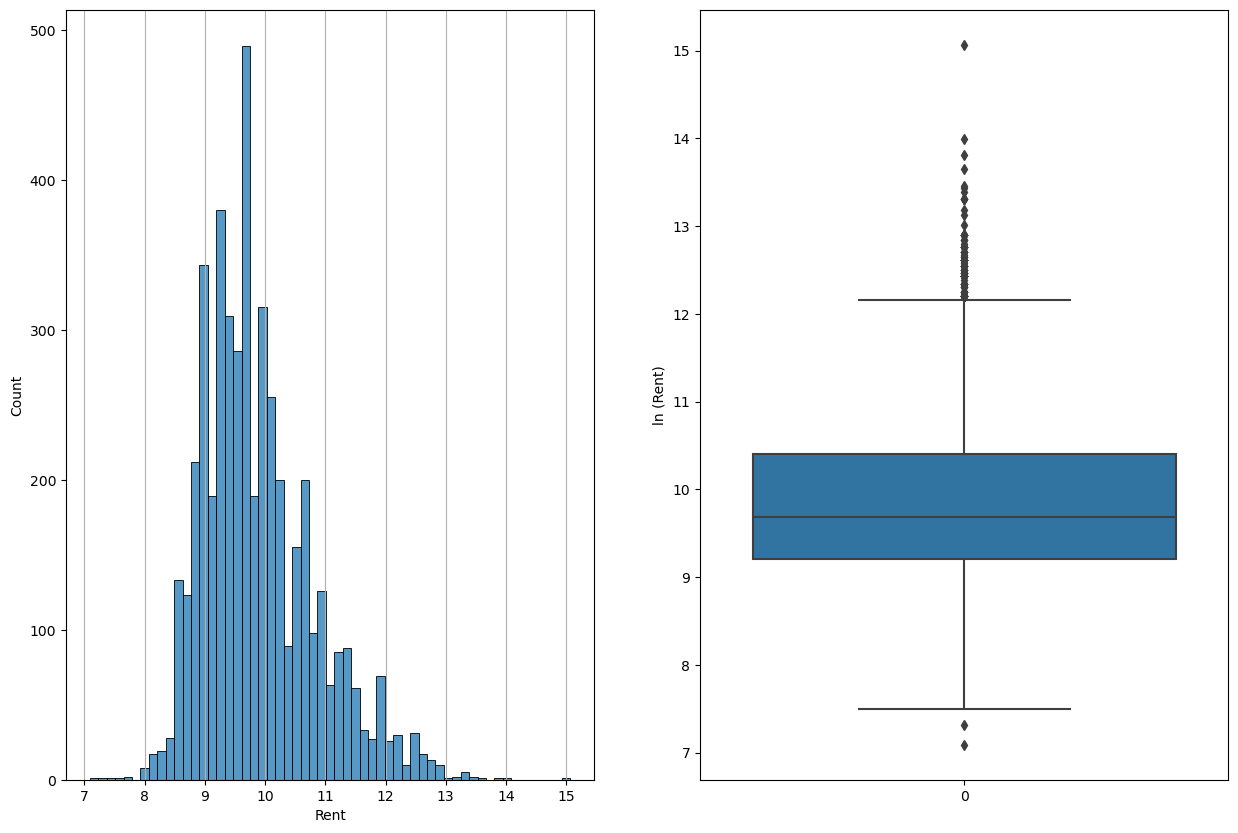

In [ ]:
fig,ax = plt.subplots(figsize=(15,10),ncols=2)
ax[0].grid(axis='x')
data = df["Rent"]
sns.histplot(np.log(data),ax=ax[0])
# sns.lineplot(np.log(data))
sns.boxplot(np.log(data),ax=ax[1])
ax[1].set_ylabel("ln (Rent)")
data.describe()

* I decided to use log function in order to reduce impact of substancial outliers which are in the Rent column.
* As we can see the rent columnn has a bit of positive skew.

### Dates distribution

     Month   Rent
0      May  10000
1      May  20000
2      May  17000
3     July  10000
4      May   7500
...    ...    ...
4741   May  15000
4742   May  29000
4743  July  35000
4744  July  45000
4745   May  15000

[4746 rows x 2 columns]


,Month number,Rent
Month number,1.00000,0.70373
Rent,0.70373,1.00000


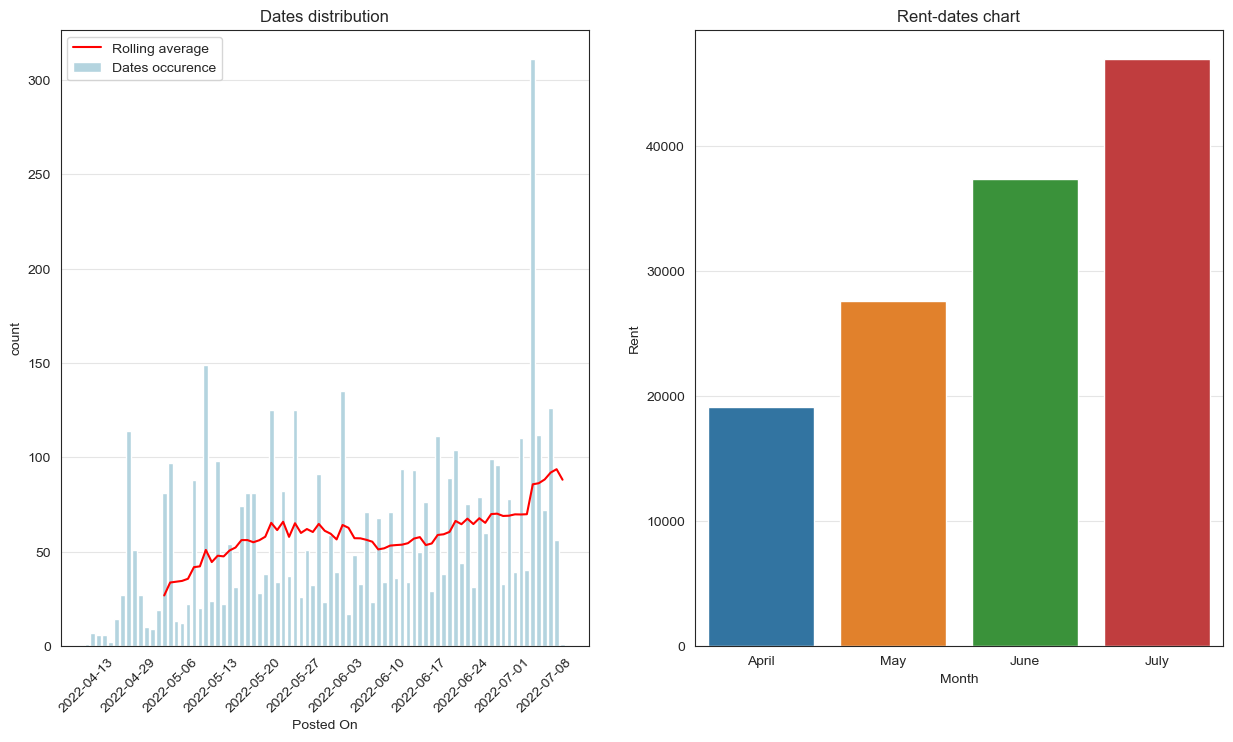

In [ ]:
# sns.set_style("whitegrid")

fig,axes = plt.subplots(figsize=(12,6),ncols=2)



data = df['Posted On'].value_counts().sort_index()
ax = sns.barplot(x=data.index,y=data,
                color='lightblue',label="Dates occurence",ax=axes[0])
ax1 = sns.lineplot(x=data.index,y=data.rolling(14).mean(),
                color='red',zorder=999,label="Rolling average",ax=axes[0])
ax1.tick_params(axis='x',rotation=90)
ax1.set_title("Dates distribution")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y',alpha=0.5)
ax1.set_xticks(
            ticks=range(0, len(data),7)
            )


data = df[['Month','Rent']]
month_order = ['April', 'May', 'June', 'July']
print(data)
ax2 = sns.barplot(x=data['Month'],y=data['Rent'],ax=axes[1],order=month_order,errorbar=None)
ax2.grid(axis='y',alpha=0.5)
ax2.set_title("Rent-dates chart")
df[['Month number','Rent']].groupby(by="Month number").sum().reset_index().corr()
# for container in ax2:
#     print(container)


* Listings posted remained relatively consistent across our dataset, regardless of the date. However when rolling average of last 14 days is applied we can conclude that there are slightly more postings over time.
* There's high, positive correlation between the time and the rent. The further we go, the costlier listings appear to be.


### Floors

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4743, dtype: int64


,Rent,Floor_number
Rent,1.0000,0.3262
Floor_number,0.3262,1.0000


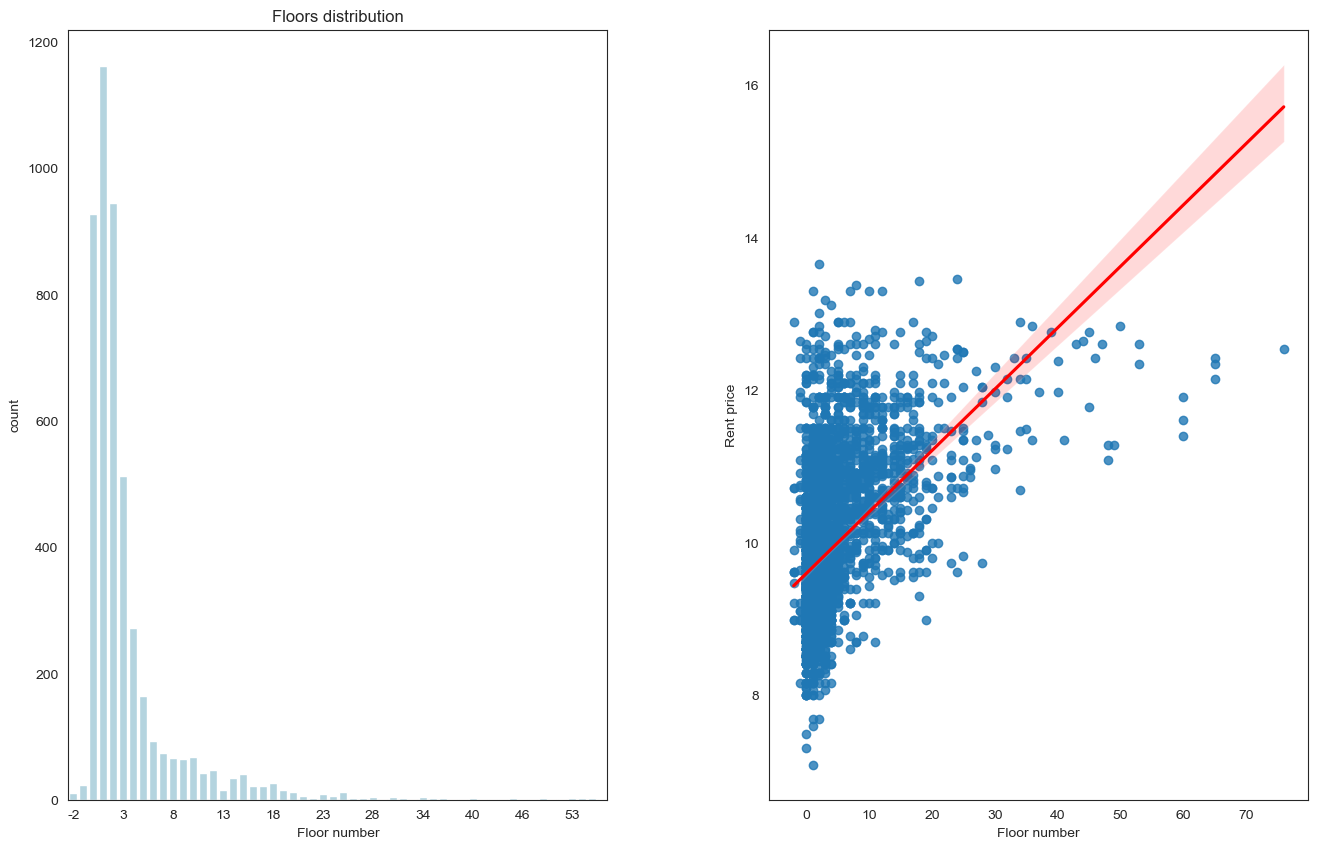

In [39]:
#Floors
fig,axes = plt.subplots(figsize=(16,10),ncols=2)

ax1 = axes[0]
data = df['Floor_number'].value_counts().sort_index()
x=data.index
max_floors = data.idxmax()
num_of_floors = data.max()
sns.barplot(x=x,y=data,ax=ax1,color='lightblue')
ax1.set_title("Floors distribution")
ax1.set_xlabel("Floor number")
ax1.set_xticks(
            ticks=range(0, len(data),5)
            )

ax2 = axes[1]
data = df[df['Rent']<1e6] # without that one outlier of 3e6
y_data = np.log(data['Rent'])
sns.regplot(x=data['Floor_number'],y=y_data,ax=ax2,line_kws={"color":"red"}).set_xlabel("Floor number")
ax2.set_ylabel("Rent price")



plt.subplots_adjust(wspace=0.3, hspace=0.6)
np.corrcoef(data['Floor_number'],data["Rent"])
print(data["Rent"])
df[['Rent','Floor_number']].corr()

* Floors -2,-1 refer to basement
* At first glance floors column doesn't appear to be strongly correlated with the Rent.


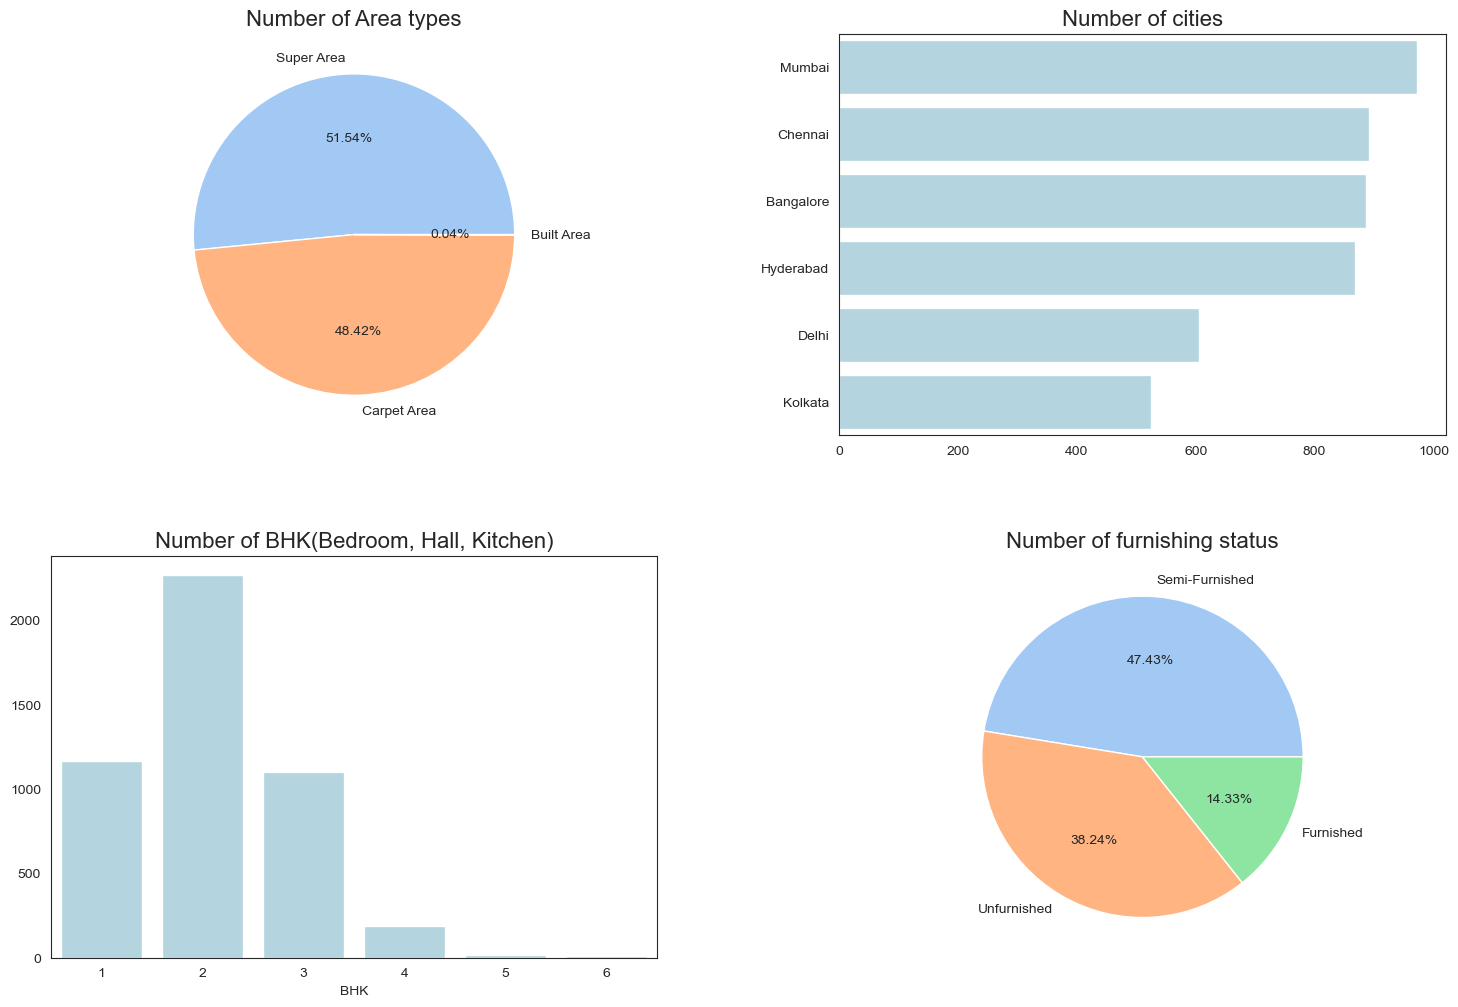

In [58]:
sns.set_style("white")
fig,axes = plt.subplots(figsize=(18,12),nrows=2,ncols=2)

ax1 = axes[0, 0]
area_type_counts = df["Area Type"].value_counts()
ax1.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
ax1.set_title("Number of Area types", fontsize=16)

# Plot for City
ax2 = axes[0, 1]
sns.barplot(x=df["City"].value_counts().values, y=df["City"].value_counts().index, ax=ax2, color='lightblue')
ax2.set_title("Number of cities", fontsize=16)

# Plot for BHK
ax3 = axes[1, 0]
data = df["BHK"].value_counts()
sns.barplot(x=data.index, y=data, ax=ax3, color='lightblue')
ax3.set_title("Number of BHK(Bedroom, Hall, Kitchen)", fontsize=16)

# Plot for Furnishing Status
ax4 = axes[1, 1]
# sns.barplot(x=df["Furnishing Status"].value_counts().values, y=df["Furnishing Status"].value_counts().index, ax=ax4, color='cyan',)
ax4.pie(df["Furnishing Status"].value_counts().values, labels=df["Furnishing Status"].value_counts().index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
ax4.set_title("Number of furnishing status", fontsize=16)


for ax_row in axes:
    for ax in ax_row:
        ax.set_ylabel("")
# plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

#### Takeaways
* As we can see most of the listings are distributed more or less equally throughout the cities with **most** being in **Mumbai** (number) and the **least** in **Kolkata**
* Area types is spread among super area and carpet area with tiny percentage for built area type
* Majority of rental properties has 2 BHK 
* Also we should know that only a small fraction of them is said to be fully furnished while the other are either unfurnished or semi-furnished